In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error,classification_report, rand_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, adjusted_mutual_info_score
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from nltk.stem import PorterStemmer
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error
random.seed(42)
np.random.seed(42)



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_di = pd.read_csv('/content/drive/MyDrive/ECE219/HW4/diamonds_ece219.csv')
df_di.drop(['Unnamed: 0'], axis=1, inplace=True)

df_di.head()

,color,clarity,carat,cut,symmetry,polish,depth_percent,table_percent,length,width,depth,girdle_min,girdle_max,price
0,E,VVS2,0.09,Excellent,Very Good,Very Good,62.7,59.0,2.85,2.87,1.79,M,M,200
1,E,VVS2,0.09,Very Good,Very Good,Very Good,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,E,VVS2,0.09,Excellent,Very Good,Very Good,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,E,VVS2,0.09,Excellent,Very Good,Very Good,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,E,VVS2,0.09,Very Good,Very Good,Excellent,64.9,58.5,2.79,2.83,1.82,STK,STK,200


#Q1

## 1.1

In [7]:
from sklearn.preprocessing import LabelEncoder


labelencoded_df = df_di.copy()
le = LabelEncoder()

# Define your categorical features
categorical_features = ['color','cut', 'clarity','polish','girdle_min',	'girdle_max','symmetry']
for column in categorical_features:
  labelencoded_df[column] = le.fit_transform(labelencoded_df[column])


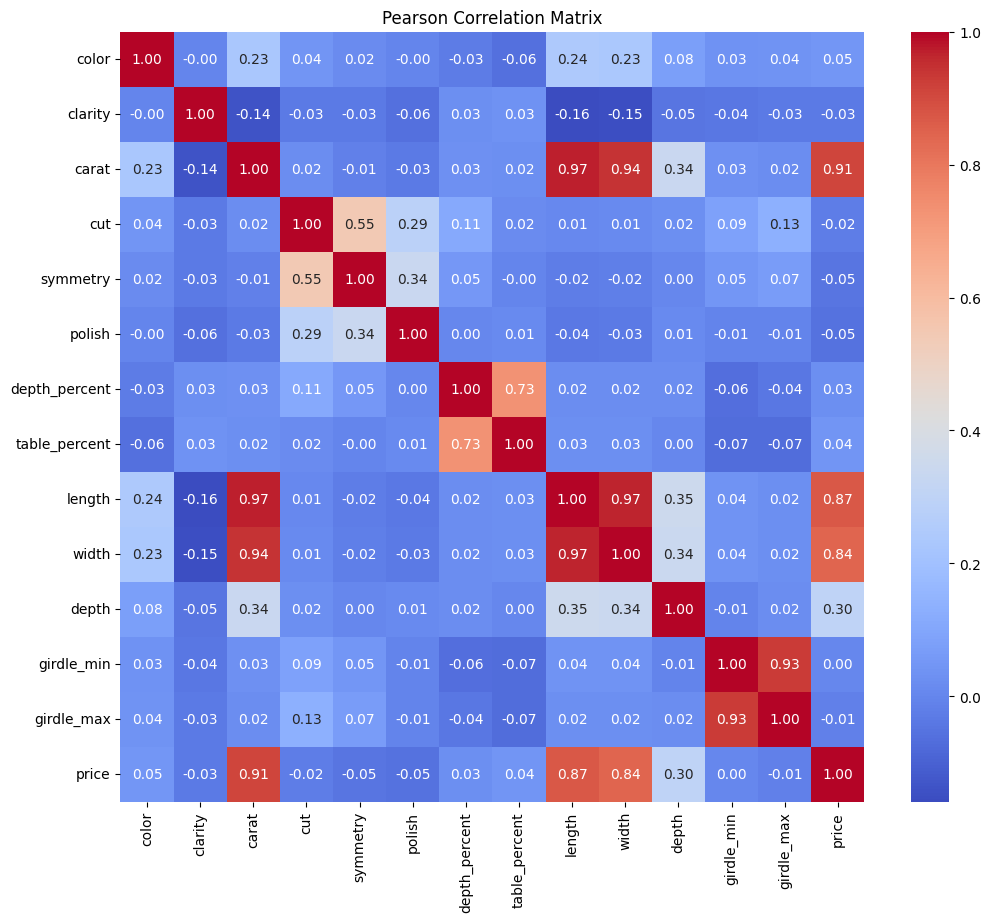

Features with the highest absolute correlation with 'price':
 carat            0.913479
length           0.869521
width            0.841887
depth            0.299696
polish           0.054928
color            0.047189
symmetry         0.047149
table_percent    0.042453
clarity          0.032342
depth_percent    0.025469
cut              0.024356
girdle_max       0.014062
girdle_min       0.000619
Name: price, dtype: float64


In [9]:
# Calculate the Pearson correlation matrix

corr = labelencoded_df.corr(method = 'pearson')

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

# Find the features with the highest absolute correlation with the target variable 'price'
target_corr = corr['price'].drop('price').abs().sort_values(ascending=False)
print("Features with the highest absolute correlation with 'price':\n", target_corr)


### It suggest carat, length and width are 3 most relevent factors to the dimond price as they have highest pearson scores to the price. In the context of diamond price, it suggest if a diamond increase its size, whether through weight or physical dimensions, they would become much more valubale.

## 1.2

In [10]:
numerical_features = df_di.select_dtypes(include=['float64', 'int64']).columns
numerical_features

Index(['carat', 'depth_percent', 'table_percent', 'length', 'width', 'depth',
       'price'],
      dtype='object')

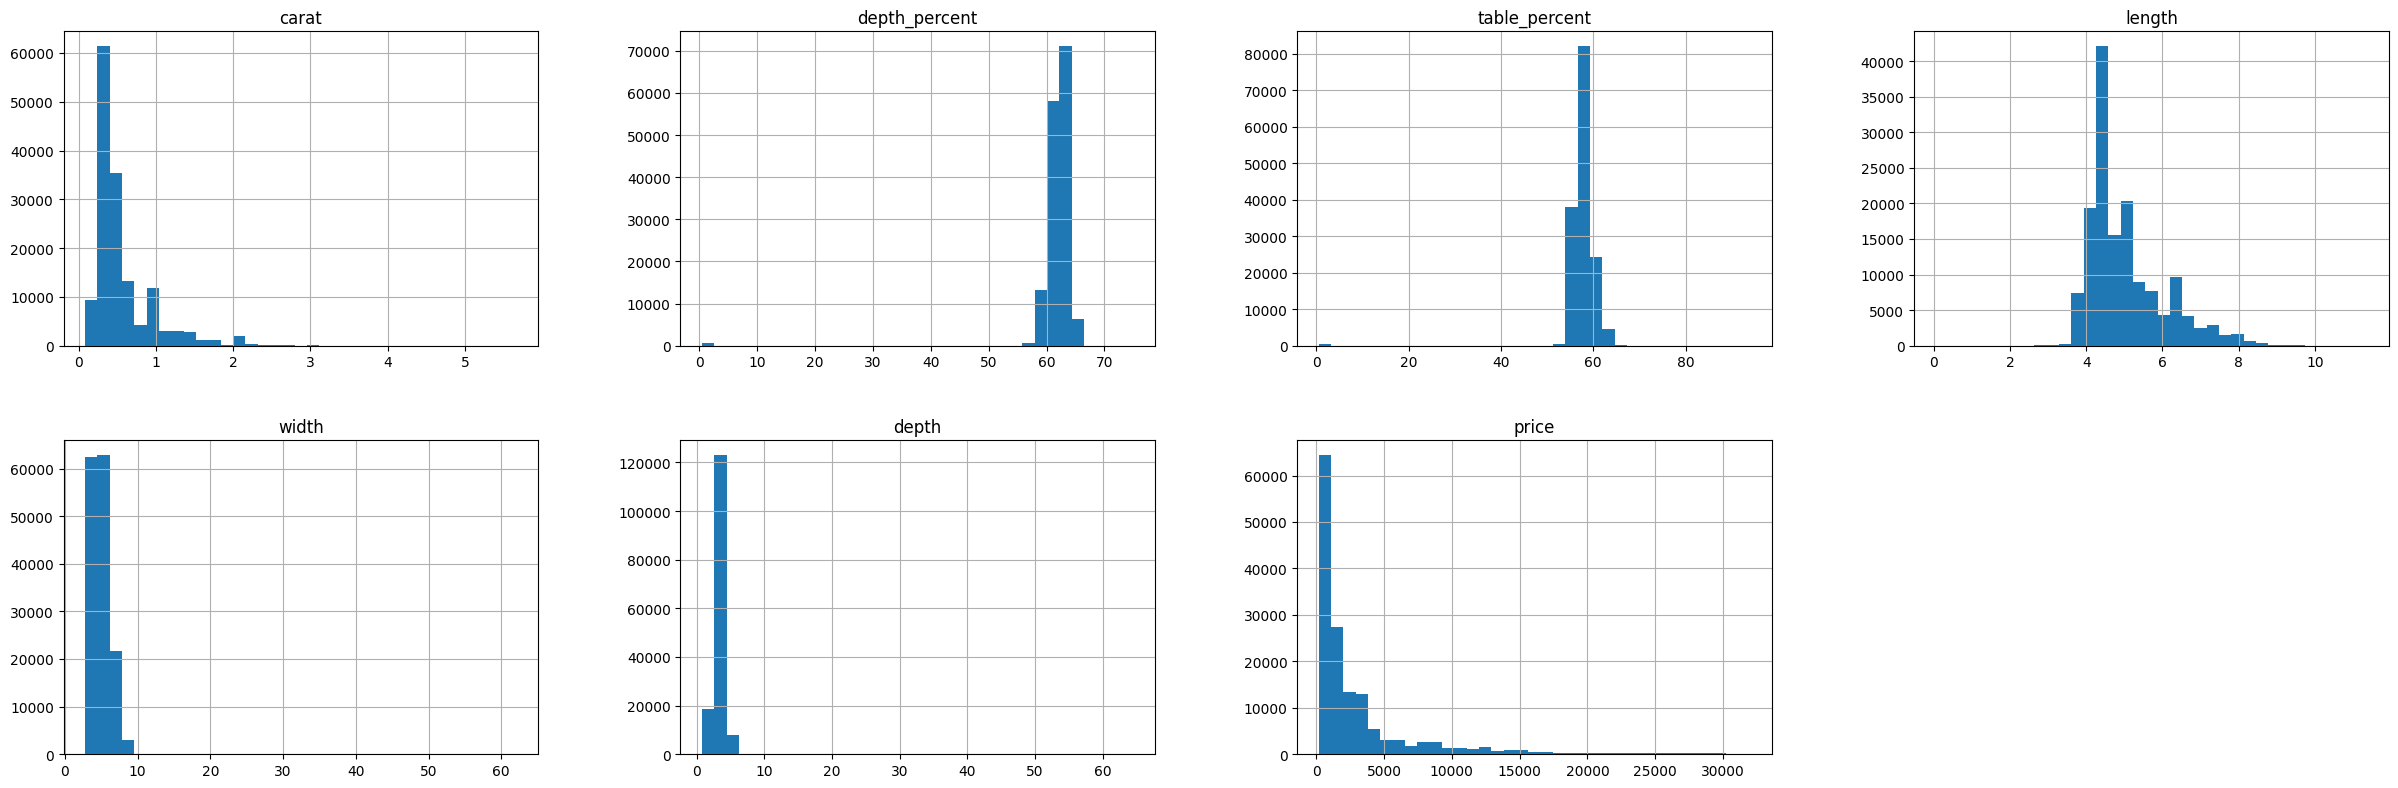

In [12]:
# Plotting histograms
df_di[numerical_features].hist(bins=35, figsize=(30,20 ), layout=(4, 4))
plt.show()

### Log transformation can be used if any factor displays a high skewness.

##1.3

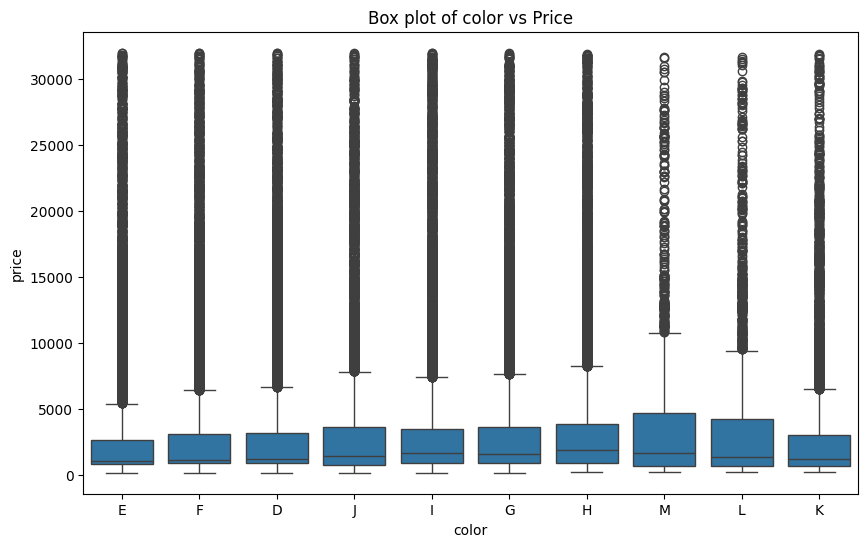

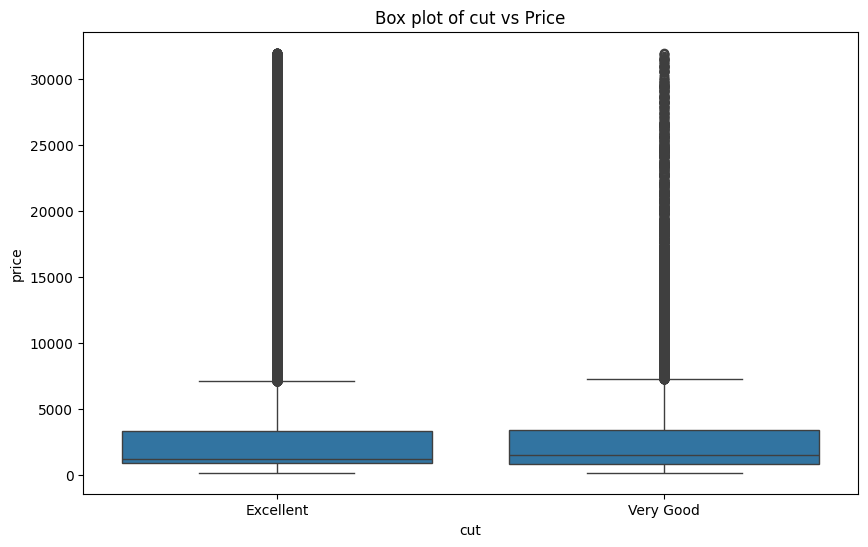

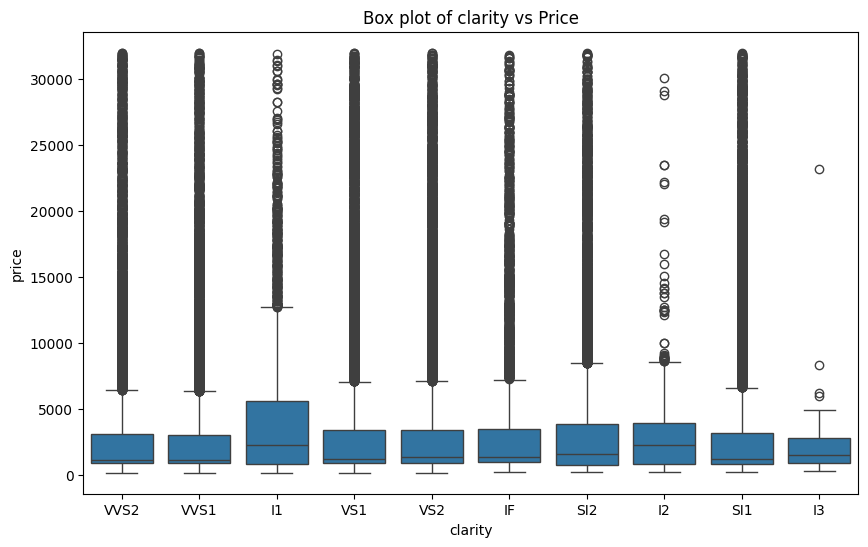

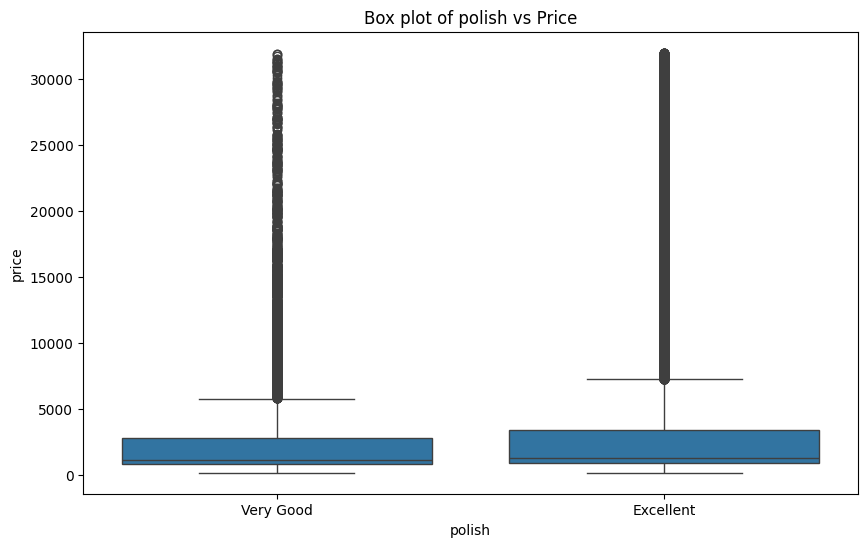

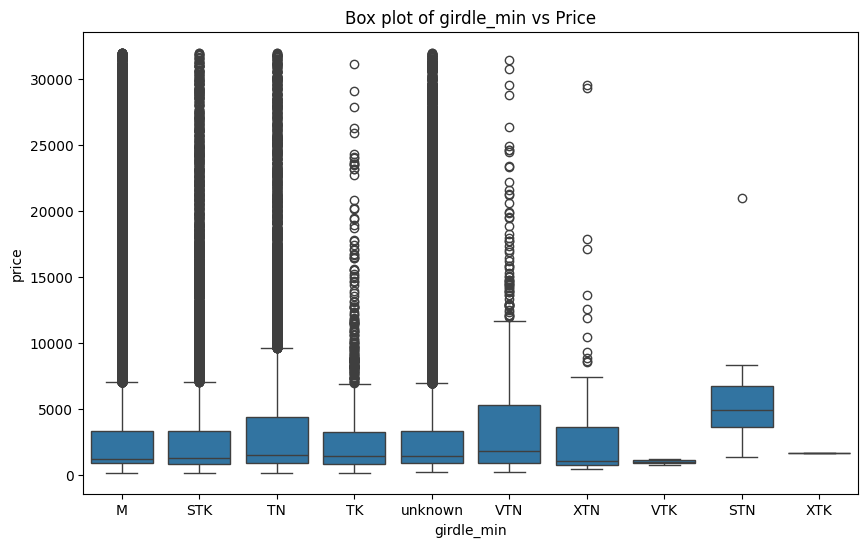

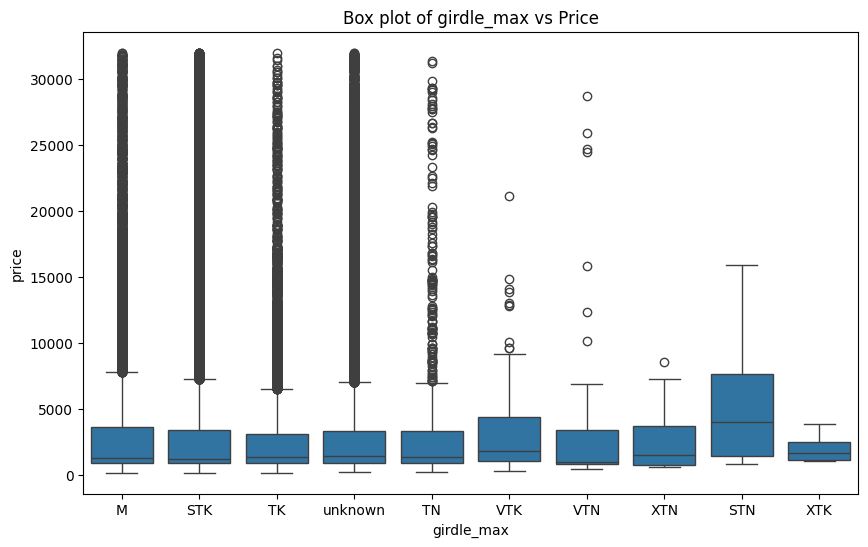

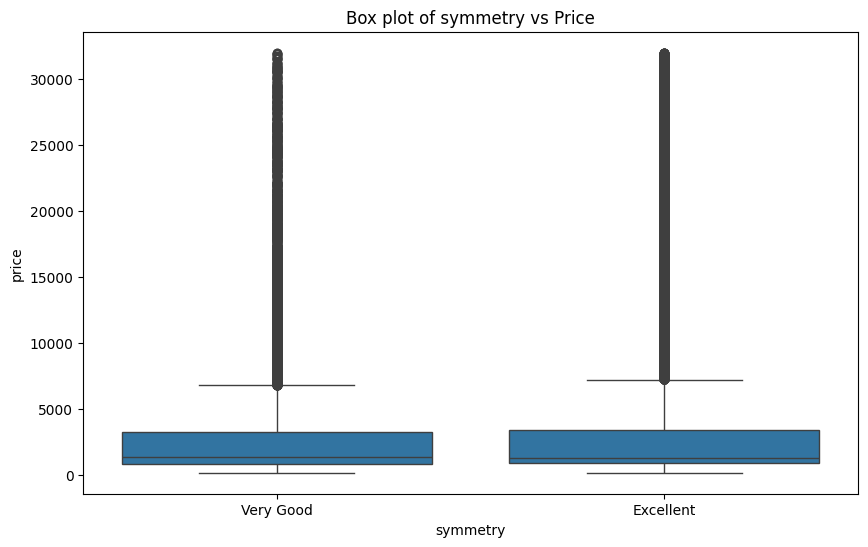

In [ ]:
categorical_features = ['color','cut', 'clarity','polish','girdle_min',	'girdle_max','symmetry']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='price', data=df_di)
    plt.title(f'Box plot of {feature} vs Price')
    plt.show()

### Cut, Polish, and Symmetry may not affect the price of diamond significantly because price of diamonds have similar range and density in different categories of cut, polish, and symmetry.

## 1.4

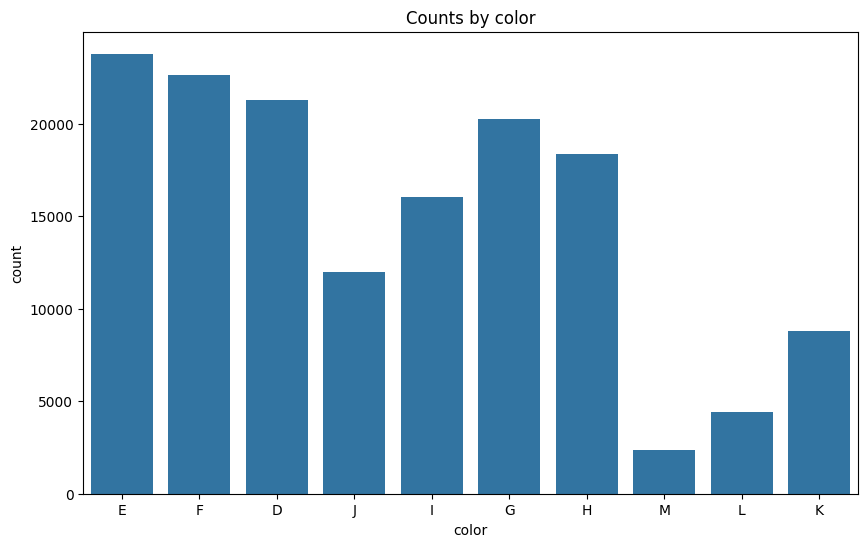

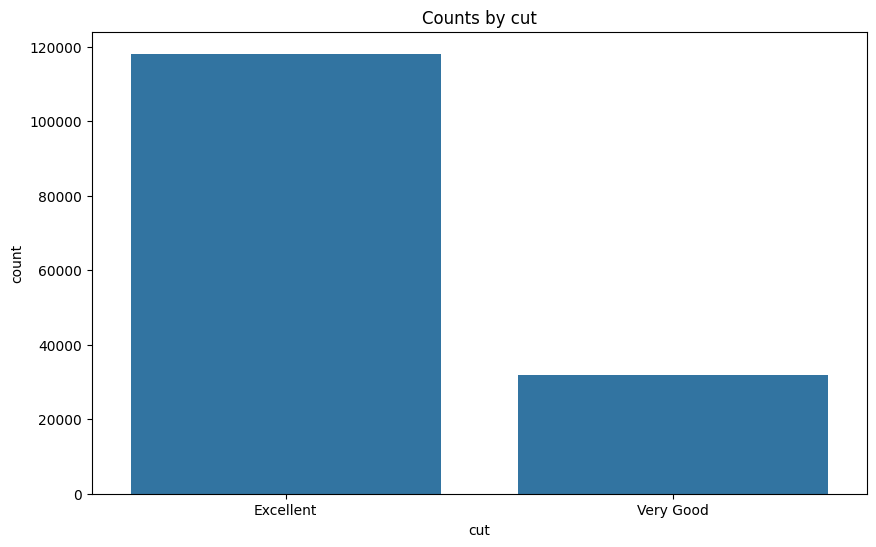

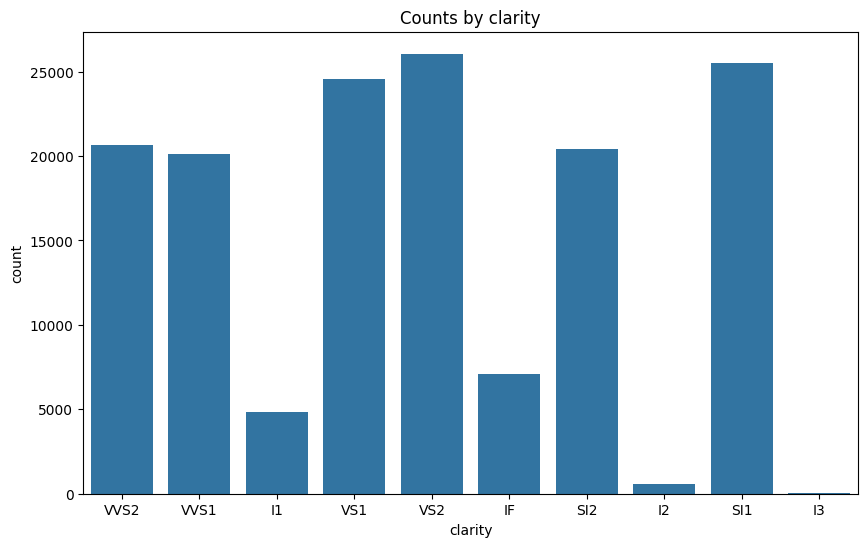

In [ ]:
categorical_features = ['color', 'cut', 'clarity']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df_di)
    plt.title(f'Counts by {feature}')
    plt.show()

# 2

## 2.1

In [ ]:
from sklearn.preprocessing import LabelEncoder


encoded_df = df_di.copy()

# Define your categorical features
categorical_features = ['color','cut', 'clarity','polish','girdle_min',	'girdle_max','symmetry']
encoded_df = pd.get_dummies(encoded_df, columns=categorical_features)



'''# Initialize and apply LabelEncoder
for column in categorical_features:
    label_encoder = LabelEncoder()
    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])'''


'# Initialize and apply LabelEncoder\nfor column in categorical_features:\n    label_encoder = LabelEncoder()\n    encoded_df[column] = label_encoder.fit_transform(encoded_df[column])'

In [ ]:
encoded_df

,carat,depth_percent,table_percent,length,width,depth,price,color_D,color_E,color_F,...,girdle_max_STN,girdle_max_TK,girdle_max_TN,girdle_max_VTK,girdle_max_VTN,girdle_max_XTK,girdle_max_XTN,girdle_max_unknown,symmetry_Excellent,symmetry_Very Good
0,0.09,62.7,59.0,2.85,2.87,1.79,200,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0.09,61.9,59.0,2.84,2.89,1.78,200,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0.09,61.1,59.0,2.88,2.90,1.77,200,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0.09,62.0,59.0,2.86,2.88,1.78,200,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0.09,64.9,58.5,2.79,2.83,1.82,200,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149866,2.01,63.0,59.0,7.98,8.03,5.05,31984,0,0,0,...,0,0,0,0,0,0,0,0,1,0
149867,1.90,62.7,57.0,7.82,7.87,4.92,31989,0,0,1,...,0,0,0,0,0,0,0,1,1,0
149868,2.45,61.2,60.0,8.58,8.65,5.28,31989,0,0,0,...,0,0,0,0,0,0,0,1,1,0
149869,2.50,59.1,62.0,8.80,8.85,5.22,31992,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Assuming 'encoded_df' is your DataFrame and all columns except 'price' are features
features = encoded_df.drop('price', axis=1)  # Dropping the target column to isolate features
target = encoded_df['price']  # Isolating the target column

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(features)

# If you want to convert the scaled features back to a DataFrame
encoded_df = pd.DataFrame(scaled_features, columns=features.columns)
encoded_df['price'] = target
encoded_df

,carat,depth_percent,table_percent,length,width,depth,color_D,color_E,color_F,color_G,...,girdle_max_TK,girdle_max_TN,girdle_max_VTK,girdle_max_VTN,girdle_max_XTK,girdle_max_XTN,girdle_max_unknown,symmetry_Excellent,symmetry_Very Good,price
0,-1.157106,0.215866,0.345119,-2.146391,-2.078247,-0.730430,-0.406722,2.302809,-0.421735,-0.395467,...,-0.331314,-0.085633,-0.029122,-0.017899,-0.005776,-0.007306,-0.740798,-1.746964,1.746964,200
1,-1.157106,0.014689,0.345119,-2.156289,-2.059209,-0.735681,-0.406722,2.302809,-0.421735,-0.395467,...,-0.331314,-0.085633,-0.029122,-0.017899,-0.005776,-0.007306,-0.740798,-1.746964,1.746964,200
2,-1.157106,-0.186488,0.345119,-2.116697,-2.049690,-0.740932,-0.406722,2.302809,-0.421735,-0.395467,...,-0.331314,-0.085633,-0.029122,-0.017899,-0.005776,-0.007306,-0.740798,-1.746964,1.746964,200
3,-1.157106,0.039836,0.345119,-2.136493,-2.068728,-0.735681,-0.406722,2.302809,-0.421735,-0.395467,...,-0.331314,-0.085633,-0.029122,-0.017899,-0.005776,-0.007306,-0.740798,-1.746964,1.746964,200
4,-1.157106,0.769101,0.218693,-2.205778,-2.116324,-0.714676,-0.406722,2.302809,-0.421735,-0.395467,...,-0.331314,-0.085633,-0.029122,-0.017899,-0.005776,-0.007306,-0.740798,-1.746964,1.746964,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149866,3.631605,0.291307,0.345119,2.931233,2.833676,0.981472,-0.406722,-0.434252,-0.421735,2.528656,...,-0.331314,-0.085633,-0.029122,-0.017899,-0.005776,-0.007306,-0.740798,0.572422,-0.572422,31984
149867,3.357252,0.215866,-0.160588,2.772867,2.681369,0.913206,-0.406722,-0.434252,2.371155,-0.395467,...,-0.331314,-0.085633,-0.029122,-0.017899,-0.005776,-0.007306,1.349895,0.572422,-0.572422,31989
149868,4.729018,-0.161341,0.597973,3.525108,3.423869,1.102251,-0.406722,-0.434252,-0.421735,-0.395467,...,-0.331314,-0.085633,-0.029122,-0.017899,-0.005776,-0.007306,1.349895,0.572422,-0.572422,31989
149869,4.853724,-0.689429,1.103680,3.742861,3.614253,1.070743,-0.406722,-0.434252,-0.421735,-0.395467,...,-0.331314,-0.085633,-0.029122,-0.017899,-0.005776,-0.007306,-0.740798,0.572422,-0.572422,31992


## 2.2

In [ ]:
X = encoded_df.drop('price', axis=1)  # Features
y = encoded_df['price']  # Target variable

In [ ]:
# Compute mutual information
mi_scores = mutual_info_regression(X, y)
mi_scores_series = pd.Series(mi_scores, index=X.columns)

# Display the mutual information scores



In [ ]:
print(mi_scores_series.sort_values(ascending=True))


girdle_max_VTN        0.000000
girdle_max_VTK        0.000000
girdle_max_TN         0.000000
girdle_min_TK         0.000000
girdle_min_STN        0.000000
clarity_I3            0.000000
girdle_min_VTK        0.000041
girdle_max_XTK        0.000056
girdle_min_TN         0.000260
girdle_min_VTN        0.000475
girdle_max_XTN        0.000691
girdle_max_STN        0.001247
girdle_min_STK        0.001931
girdle_min_XTN        0.002180
clarity_I2            0.003035
girdle_min_XTK        0.003096
girdle_max_M          0.003531
color_M               0.009113
polish_Excellent      0.009136
polish_Very Good      0.010230
color_L               0.012534
girdle_max_TK         0.013074
clarity_IF            0.013965
girdle_min_M          0.015720
girdle_max_STK        0.017738
girdle_max_unknown    0.017754
clarity_I1            0.018417
color_I               0.018850
color_K               0.019022
color_J               0.019126
girdle_min_unknown    0.019347
cut_Excellent         0.022035
clarity_

In [ ]:
from sklearn.feature_selection import f_regression

# Compute F-scores and p-values
f_scores, p_values = f_regression(X, y)
f_scores_series = pd.Series(f_scores, index=X.columns)

# Display the F-scores
print(f_scores_series.sort_values(ascending=False))


carat                 755380.195809
length                464517.682462
width                 364744.610195
depth                  14789.226399
polish_Excellent         453.535242
polish_Very Good         453.535242
color_E                  385.915058
girdle_min_TN            360.585173
symmetry_Excellent       333.901556
symmetry_Very Good       333.901556
color_H                  313.425181
table_percent            270.590496
girdle_max_TK            163.647213
clarity_VVS1             130.575846
color_G                  125.756673
clarity_I1               124.744390
color_F                  121.029798
color_I                  103.197063
depth_percent             97.274940
cut_Excellent             88.958031
cut_Very Good             88.958031
girdle_max_M              86.422568
color_D                   61.315023
clarity_VVS2              54.847715
clarity_VS1               52.732983
color_M                   42.136093
color_K                   40.180136
girdle_min_M              36

### Model Selection would improve test performance because it reduce the overfitting  because models are less likely to learn from the noisy data. Theoretically, such method would improve every model performance and decrease training time, but it may not be that effective for random forest model because it is designed in a way that it can perform good feature slection inherently.<br>girdle_max_VTN and girdle_max_VTK have lowest MI score to the price.


### I combined top 8 features from mutual information and F^2 score as my final selected features.

In [ ]:
#selected_features = ['carat','width','length','depth','color','clarity']
selected_features =['carat','width','length','depth','polish_Excellent','color_E','depth_percent','clarity_SI2','clarity_SI1','cut_Very Good']
X_selected = X[selected_features]


In [ ]:
X_selected

,carat,width,length,depth,polish_Excellent,color_E,depth_percent,clarity_SI2,clarity_SI1,cut_Very Good
0,-1.157106,-2.078247,-2.146391,-0.730430,-2.522184,2.302809,0.215866,-0.397248,-0.453008,-0.518390
1,-1.157106,-2.059209,-2.156289,-0.735681,-2.522184,2.302809,0.014689,-0.397248,-0.453008,1.929051
2,-1.157106,-2.049690,-2.116697,-0.740932,-2.522184,2.302809,-0.186488,-0.397248,-0.453008,-0.518390
3,-1.157106,-2.068728,-2.136493,-0.735681,-2.522184,2.302809,0.039836,-0.397248,-0.453008,-0.518390
4,-1.157106,-2.116324,-2.205778,-0.714676,0.396482,2.302809,0.769101,-0.397248,-0.453008,1.929051
...,...,...,...,...,...,...,...,...,...,...
149866,3.631605,2.833676,2.931233,0.981472,0.396482,-0.434252,0.291307,-0.397248,-0.453008,-0.518390
149867,3.357252,2.681369,2.772867,0.913206,0.396482,-0.434252,0.215866,-0.397248,-0.453008,-0.518390
149868,4.729018,3.423869,3.525108,1.102251,0.396482,-0.434252,-0.161341,-0.397248,-0.453008,-0.518390
149869,4.853724,3.614253,3.742861,1.070743,0.396482,-0.434252,-0.689429,-0.397248,-0.453008,-0.518390


# Q4

## 4.1

$$
\text{Objective function (OLS)} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
$$
\text{Objective function (Lasso)} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |w_j|
$$
$$
\text{Objective function (Ridge)} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} w_j^2
$$
Lasso Effect: The L1 penalty tends to shrink some coefficients exactly to zero, effectively performing feature selection by removing those features from the model. It is useful when we believe many features are irrelevant or when we want a sparse model for interpretation or to reduce dimensionality.

Ridge Effect: The L2 penalty shrinks the coefficients towards zero but does not set them exactly to zero. This is particularly beneficial in cases of multicollinearity, where it helps in distributing the coefficient values more evenly across correlated features, leading to more stable and generalized models. Ridge regression is less likely to completely eliminate features but ensures that the model does not overly rely on any single feature.

## 4.2

In [ ]:
# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scorer = make_scorer(rmse, greater_is_better=False)



In [ ]:
lr = LinearRegression()
lr_rmse_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring=rmse_scorer)
lr_rmse_avg = np.mean(lr_rmse_scores)

In [ ]:
lr_rmse_scores

array([-1774.30348733, -1809.14763273, -1829.86167641, -1847.94074708,
       -1887.89420581, -1754.22713643, -1853.2173125 , -1765.97993358,
       -1824.75576106, -1799.4416811 ])

In [ ]:
# Define parameter ranges for Lasso and Ridge
lasso_params = {'alpha': [10.0**x for x in np.arange(-5,5)]}
ridge_params = {'alpha':[10.0**x for x in np.arange(-5,5)]}
ridge_params

{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}

In [ ]:
# Lasso Regression
lasso = Lasso(random_state=42, max_iter=10000)
lasso_grid = GridSearchCV(lasso, lasso_params, cv=10, scoring=rmse_scorer)
lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=10000, random_state=42),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                   100.0, 1000.0, 10000.0]},
             scoring=make_scorer(rmse, greater_is_better=False))

In [ ]:
# Ridge Regression
ridge = Ridge(random_state=42, max_iter=10000)
ridge_grid = GridSearchCV(ridge, ridge_params, cv=10, scoring=rmse_scorer)
ridge_grid.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=Ridge(max_iter=10000, random_state=42),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                   100.0, 1000.0, 10000.0]},
             scoring=make_scorer(rmse, greater_is_better=False))

In [ ]:
# Print the results
print(f"OLS Average RMSE: {-lr_rmse_avg}")
print(f"Lasso Best Alpha: {lasso_grid.best_params_['alpha']} with Average RMSE: {-lasso_grid.best_score_}")
print(f"Ridge Best Alpha: {ridge_grid.best_params_['alpha']} with Average RMSE: {-ridge_grid.best_score_}")

OLS Average RMSE: 1814.6769574035861
Lasso Best Alpha: 1e-05 with Average RMSE: 1814.6769590098029
Ridge Best Alpha: 1e-05 with Average RMSE: 1814.6769574082616


### I calculate the average of root mean squared error of test score to compare their performance and I used the grid search to find the best parameters of different regularization scheme. To my surprise, ordinary least squares has the best performance because it has smallest training RMSE. Ridge has a marginal advanatge compared with lasso regularization because it has slightly smaller RMSE. They all very close to each other.

## 4.3

In [ ]:
encoded_df_no = df_di.copy()

# Define your categorical features
categorical_features = ['color','cut', 'clarity','polish','girdle_min',	'girdle_max','symmetry']
encoded_df_no = pd.get_dummies(encoded_df_no, columns=categorical_features)


# Define your categorical features
#selected_features = ['carat','width','length','depth','color','clarity']


'''
# Define your categorical features
categorical_features = ['color','cut', 'clarity','polish','girdle_min',	'girdle_max','symmetry']
encoded_df = pd.get_dummies(encoded_df, columns=categorical_features)
# Initialize and apply LabelEncoder
for column in categorical_features:
    label_encoder = LabelEncoder()
    encoded_df_no[column] = label_encoder.fit_transform(encoded_df_no[column])'''



"\n# Define your categorical features\ncategorical_features = ['color','cut', 'clarity','polish','girdle_min',\t'girdle_max','symmetry']\nencoded_df = pd.get_dummies(encoded_df, columns=categorical_features)\n# Initialize and apply LabelEncoder\nfor column in categorical_features:\n    label_encoder = LabelEncoder()\n    encoded_df_no[column] = label_encoder.fit_transform(encoded_df_no[column])"

In [ ]:
X_nostand = encoded_df_no.drop('price', axis=1)  # Features
y_nostand = encoded_df_no['price']

In [ ]:
selected_features =['carat','width','length','depth','polish_Excellent','color_E','depth_percent','clarity_SI2','clarity_SI1','cut_Very Good']

#selected_features = ['carat','width','length','depth','color','clarity']
X_selected_nostand = X_nostand[selected_features]
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_selected_nostand, y_nostand, test_size=0.2, random_state=42)
X_train_no


,carat,width,length,depth,polish_Excellent,color_E,depth_percent,clarity_SI2,clarity_SI1,cut_Very Good
80033,0.55,5.22,5.19,3.26,1,0,62.6,0,1,0
82831,0.50,5.10,5.06,3.13,1,0,61.6,0,0,1
31549,0.31,4.38,4.36,2.65,1,0,60.6,0,1,0
94480,0.60,5.43,5.40,3.37,1,0,62.7,1,0,0
78520,0.37,4.61,4.59,2.84,1,0,61.8,0,0,0
...,...,...,...,...,...,...,...,...,...,...
119879,0.71,6.62,5.60,3.56,0,0,63.5,1,0,1
103694,0.56,5.28,5.24,3.30,1,0,62.8,0,1,0
131932,1.07,6.55,6.52,4.08,1,0,62.4,1,0,0
146867,1.25,6.95,6.93,4.30,1,0,61.9,0,0,0


In [ ]:
ridge2 = Ridge(random_state=42,max_iter=10000)
ridge_grid2 = GridSearchCV(ridge2, ridge_params, cv=10, scoring=rmse_scorer)
ridge_grid2.fit(X_train_no, y_train_no)


GridSearchCV(cv=10, estimator=Ridge(max_iter=10000, random_state=42),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                   100.0, 1000.0, 10000.0]},
             scoring=make_scorer(rmse, greater_is_better=False))

In [ ]:
print(f"Ridge Best Alpha: {ridge_grid2.best_params_['alpha']} with Average RMSE: {-ridge_grid2.best_score_}")


Ridge Best Alpha: 1.0 with Average RMSE: 1814.6765279790804


In [ ]:
ridge_no_results_df = pd.DataFrame(ridge_grid2.cv_results_)
ridge_no_results_df[['param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']]


,param_alpha,mean_test_score,std_test_score,rank_test_score
0,0.00001,-1814.676957,40.253009,6
1,0.0001,-1814.676957,40.253009,5
2,0.001,-1814.676956,40.253010,4
3,0.01,-1814.676947,40.253018,3
4,0.1,-1814.676862,40.253096,2
5,1.0,-1814.676528,40.253935,1
6,10.0,-1814.724147,40.267635,7
7,100.0,-1819.243456,40.790392,8
8,1000.0,-1933.891886,45.988378,9
9,10000.0,-2201.505447,65.289732,10


In [ ]:
ridge_results_df = pd.DataFrame(ridge_grid.cv_results_)
ridge_results_df[['param_alpha', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_alpha,mean_test_score,std_test_score,rank_test_score
0,0.00001,-1814.676957,40.253009,1
1,0.0001,-1814.676957,40.253009,2
2,0.001,-1814.676958,40.253008,3
3,0.01,-1814.676962,40.252999,4
4,0.1,-1814.677004,40.252909,5
5,1.0,-1814.677447,40.252011,6
6,10.0,-1814.683822,40.243221,7
7,100.0,-1814.926058,40.175939,8
8,1000.0,-1826.589544,41.177678,9
9,10000.0,-1957.388955,46.224539,10


### From my result, I don't think standarization plays an important role in inproving the model performance for this dataset because RMSEs are very close to each other, even though it is suggested to have this power by thoery.

## 4.4

In [ ]:
import statsmodels.api as sm


In [ ]:
# Add a constant to the model (intercept)
X_train_with_const = sm.add_constant(X_train)

# Fit the model
model = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                 6.880e+04
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:17:15   Log-Likelihood:            -1.0698e+06
No. Observations:              119896   AIC:                         2.140e+06
Df Residuals:                  119885   BIC:                         2.140e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3302.5186      5.240  

In [ ]:
model.pvalues.sort_values(ascending=True)


const                0.000000e+00
carat                0.000000e+00
length               0.000000e+00
color_E              0.000000e+00
clarity_SI2          0.000000e+00
clarity_SI1         6.961844e-290
cut_Very Good       1.643470e-237
polish_Excellent     2.619747e-11
depth_percent        4.423183e-09
depth                8.309577e-03
width                7.965489e-02
dtype: float64

###In linear regression, p-values are used to determine the significance of each feature in predicting the target variable. A p-value measures the probability that an observed effect (like the coefficient of a feature) could have occurred by chance if the null hypothesis is true. According to my model, all parameters are very important as P value are all very small(only girdle_max_TK and width are slightly high, but they can both be considered as significant by 10% significance level.) . Such result is reasonable because of my feature selection process ( 8 features with highest MI coefficients). The most important features would be carat because it has the smallest p value.

# Q5

##5.1

In [ ]:
from sklearn.pipeline import make_pipeline


In [ ]:
pipe_poly = Pipeline([
    ('poly_transform', PolynomialFeatures()),
    ('model', Ridge(alpha=100, random_state=42, max_iter=1000))
])

# Parameter grid for GridSearchCV
param_grid = {
    'poly_transform__degree': np.arange(1, 6)  # Adjust the range as needed; here it's set from 1 to 6 based on your requirement
}

## I used 8 folds cross validation to speed up the grid search process.

In [ ]:
# Setup GridSearchCV
grid_poly = GridSearchCV(pipe_poly, param_grid=param_grid, cv=8, n_jobs=-1, verbose=1,
                         scoring='neg_root_mean_squared_error', return_train_score=True)

In [ ]:
# Setup GridSearchCV
grid_poly = GridSearchCV(pipe_poly, param_grid=param_grid, cv=8, n_jobs=-1, verbose=1,
                         scoring='neg_root_mean_squared_error', return_train_score=True)
# Assuming X and y are your features and target variables
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model with GridSearchCV to find the optimal polynomial degree
grid_poly.fit(X_train, y_train)

# Print the best polynomial degree and the corresponding score
print(f"Best polynomial degree: {grid_poly.best_params_['poly_transform__degree']}")
print(f"Best score (negative MSE): {grid_poly.best_score_}")

Fitting 8 folds for each of 5 candidates, totalling 40 fits
Best polynomial degree: 2
Best score (negative MSE): -1647.1423699306026


In [ ]:
poly_result = pd.DataFrame(grid_poly.cv_results_)[['mean_test_score', 'mean_train_score', 'param_poly_transform__degree']]
poly_result

,mean_test_score,mean_train_score,param_poly_transform__degree
0,-1.814944e+03,-1814.540616,1
1,-1.647142e+03,-1635.269239,2
2,-2.875839e+03,-1605.923413,3
3,-6.630878e+04,-1591.282807,4
4,-2.136857e+06,-1577.349869,5


In [ ]:
pipe_poly.fit(X_train, y_train)
# Access the Ridge model and get the coefficients
ridge_model = pipe_poly.named_steps['model']
coefficients = ridge_model.coef_

# Access the polynomial features to get the feature names
poly_transform = pipe_poly.named_steps['poly_transform']
feature_names = poly_transform.get_feature_names_out(input_features=X_train.columns)

# Map feature names to their coefficients
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': np.abs(coefficients)})

# Sort features by their coefficient magnitude to identify the most salient features
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display the top 10 most salient features
print(feature_importance.head(3))

        Feature  Coefficient
12  carat width  1974.359904
1         carat  1697.290036
11      carat^2  1568.001689


### I selected degree = 2 here, and the top 3 most salient features are Carat * Width, Carat, and Carat^2, all relate to carat, the feature with highest mutual information score.

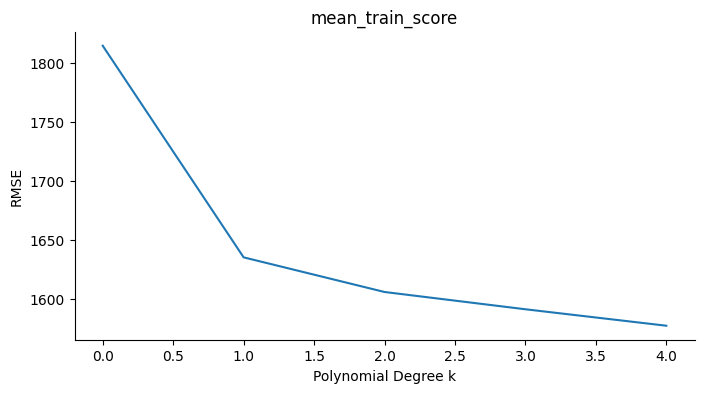

In [ ]:
# @title mean_train_score

from matplotlib import pyplot as plt
(poly_result['mean_train_score']*-1).plot(kind='line', figsize=(8, 4), title='mean_train_score')
plt.xlabel('Polynomial Degree k')
plt.ylabel('RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

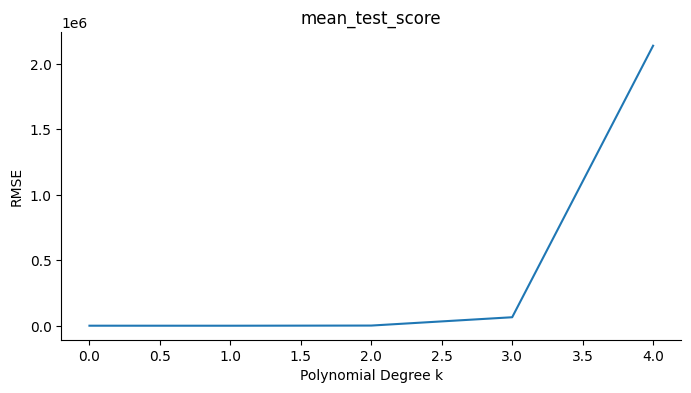

In [ ]:
# @title mean_test_score

from matplotlib import pyplot as plt
(poly_result['mean_test_score']*-1).plot(kind='line', figsize=(8, 4), title='mean_test_score')
plt.xlabel('Polynomial Degree k')
plt.ylabel('RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

## 5.2

The degree 2 is the optimal degree because it produce the best testing performance.
<br> I utilzied grid search and cross validation to go over different polynomial degree on training and testing sets, and compare their performance.
<br> A high-order polynomial imply a good fit on the trainin data which is shown by the decreasing trend of the training curve.
<br> This does not guarentee a good testing performance due to overfitting problem, this is also shown in the tesing curve, which initially decrease then increase.

# Q6

## 6.1

### I used 5 fold cross validation here because I want to test more combinations of parameters. Right now, the total number of experiments is 20, 2 * 2 * 5 = 20

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline



In [ ]:
# Define the MLPRegressor within a Pipeline
pipe_mlp = make_pipeline(StandardScaler(), MLPRegressor(random_state=42))

# Define parameter grid. Considering a limited range for demonstration
param_grid = {
    'mlpregressor__hidden_layer_sizes': [(50,), (100,)],
    'mlpregressor__alpha': [0.001, 0.01],  # Regularization term
}


In [ ]:
# Setup GridSearchCV
grid_mlp = GridSearchCV(pipe_mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')

# Fit the model
grid_mlp.fit(X_train, y_train)



Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('mlpregressor',
                                        MLPRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'mlpregressor__alpha': [0.001, 0.01],
                         'mlpregressor__hidden_layer_sizes': [(50,), (100,)]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
mlp_result = pd.DataFrame(grid_mlp.cv_results_)[['mean_test_score','param_mlpregressor__hidden_layer_sizes', 'param_mlpregressor__alpha']]
mlp_result['RMSE'] =np.sqrt(mlp_result['mean_test_score']*-1)

In [ ]:
mlp_result = mlp_result.sort_values(by='RMSE', ascending=True)
mlp_result

,mean_test_score,param_mlpregressor__hidden_layer_sizes,param_mlpregressor__alpha,RMSE
3,-2.720779e+06,"(100,)",0.01,1649.478506
1,-2.720902e+06,"(100,)",0.001,1649.515737
0,-2.757393e+06,"(50,)",0.001,1660.539828
2,-2.763576e+06,"(50,)",0.01,1662.400762


## 6.2

In general, it has a better performance compared with linear regression because it has lower RMSE score. This is because MLP can capture complex non-linear relationships between features and the target variable due to its non-linear activation functions and multiple layers. This makes MLPs very flexible in modeling complex patterns in the data. Also, MLP learns interactions between features through its hidden layers, which can be crucial for achieving high performance on tasks where feature interactions play a significant role.

## 6.3

I used linear as the activation function for the output layer because I only want to come up with a single value that predict the diamond price, instead of some probabilities, and linear is a very commonly used in regression. RELU would also work since the price is always greater or equal to 0.

## 6.4

An increase depth make the entire neural network more sophisticated and icnrease the number of parameters. This may lead to the overfitting problem.

# Q7

## 7.1

### Maximum Number of Features (max_features): Determines how many features to consider when finding the best split at each node. A lower number can increase diversity among the trees, potentially improving generalization, but too low may weaken individual trees. <br>Number of Trees (n_estimators): The total count of trees in the forest. More trees generally lead to better performance and stability of predictions at the cost of increased computational load. <br>Depth of Each Tree (max_depth): Controls the maximum depth of trees. Deeper trees can model more complex patterns but risk overfitting; shallower trees are faster to train and can reduce overfitting.

In [ ]:
rf = RandomForestRegressor(random_state=42)


In [ ]:
# Define the parameter grid to explore
param_grid = {
    'max_features': [0.5, 'sqrt', 'log2'],  # Fraction of features, square root of features, log2 of features
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30]  # Maximum depth of the trees
}

# Setup GridSearchCV to find the best hyper-parameters
grid_search_RF = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2,return_train_score=True)

# Fit the model
grid_search_RF.fit(X_train, y_train)


Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [0.5, 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [ ]:
RF_result = pd.DataFrame(grid_search_RF.cv_results_)[['mean_train_score','mean_test_score','param_max_depth','param_max_features','param_n_estimators']]
RF_result= RF_result.sort_values(by='mean_test_score', ascending=False)
RF_result

,mean_train_score,mean_test_score,param_max_depth,param_max_features,param_n_estimators
11,-1500.958538,-1584.715026,10,0.5,200
10,-1501.141624,-1584.934338,10,0.5,100
9,-1502.088804,-1586.193112,10,0.5,50
17,-1510.864952,-1587.187044,10,log2,200
14,-1510.864952,-1587.187044,10,sqrt,200
16,-1510.721626,-1587.435311,10,log2,100
13,-1510.721626,-1587.435311,10,sqrt,100
15,-1511.878165,-1588.296057,10,log2,50
12,-1511.878165,-1588.296057,10,sqrt,50
26,-994.214804,-1620.731408,20,log2,200


In [ ]:
print("Best parameters:", grid_search_RF.best_params_)
best_model = grid_search_RF.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")


Best parameters: {'max_depth': 10, 'max_features': 0.5, 'n_estimators': 200}
Test RMSE: 1589.7962207302412


## 7.2


###Random forests create highly non-linear decision boundaries through the ensemble of multiple decision trees, each of which contributes its own piecewise-linear decision boundary. At its core, a decision tree splits the input space into rectangular regions based on feature thresholds, making linear decisions at each node. While a single tree's decision boundary is relatively simple and might not capture complex patterns well, random forests combine the output of many such trees, each trained on a random subset of the data and features. This process introduces diversity in the decision boundaries of individual trees. When aggregated, these diverse, piecewise-linear boundaries can approximate highly non-linear and complex decision regions. The ensemble method effectively stitches together these simpler boundaries to form a more intricate boundary that can adapt to complicated data structures, much like how pixels of varying shades combine to form a detailed image.

###Moreover, the inherent randomness in random forests plays a crucial role in their ability to model non-linearity. By randomly selecting subsets of features for splitting at each node (feature bagging) and training each tree on a bootstrap sample of the data (data bagging), random forests ensure that each tree explores different aspects of the data. This randomness prevents the trees from being overly correlated with each other, reducing the model's variance without significantly increasing bias. The aggregation of predictions (through averaging or majority voting) across all trees further mitigates overfitting to the training data, leading to a model that is robust and generalizes well to unseen data. Thus, despite each tree making only simple, linear decisions at each node, the collective power of many trees operating in concert allows random forests to capture complex, non-linear relationships in the data.

## 7.3

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

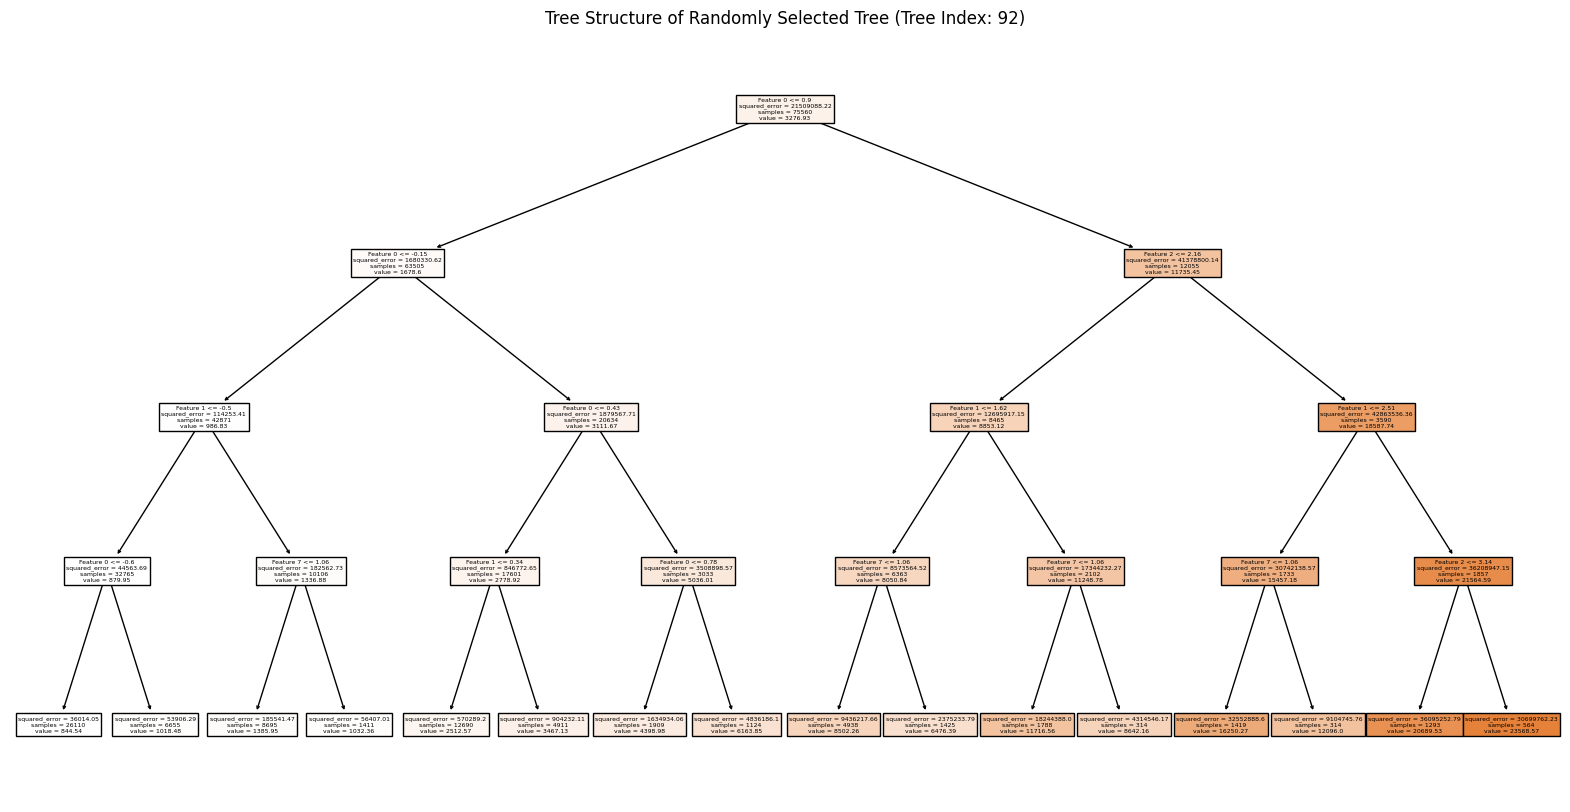

Feature selected for branching at the root node: carat
Importance of the root node feature: 0.55480656381338


In [ ]:
# Initialize and fit the Random Forest model
rf_model = RandomForestRegressor(max_depth=4, random_state=42)
rf_model.fit(X_train, y_train)

# Randomly select one tree from the random forest
# np.random.randint is used to select a random index
random_index = np.random.randint(0, len(rf_model.estimators_))
selected_tree = rf_model.estimators_[random_index]

# Plot the structure of the selected tree
plt.figure(figsize=(20, 10))
plot_tree(selected_tree, filled=True, feature_names=[f'Feature {i}' for i in range(X_train.shape[1])], max_depth=4, precision=2)
plt.title(f'Tree Structure of Randomly Selected Tree (Tree Index: {random_index})')
plt.show()

# Identifying the feature used at the root node
root_feature_index = selected_tree.tree_.feature[0]
root_feature_name = X_train.columns[root_feature_index]
print(f"Feature selected for branching at the root node: {root_feature_name}")

# Assuming you have calculated the feature importances
importances = rf_model.feature_importances_
print(f"Importance of the root node feature: {importances[root_feature_index]}")


### The selected feature at root node is carat. Since it is at root node, we can infer it is the most important feature of diamond for the model to predict its price. This result corresponds my result in part 3.3.1 as carat has the highest t value and smallest p value, indicating it's the most important feature.

## 7.4

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
# rf = RandomForestRegressor(random_state=42, oob_score=True, n_estimators=100)
rf_model.oob_score = True  # Ensure OOB scoring is enabled if the model was already defined

rf_model.fit(X_train, y_train)

# OOB Score
oob_error = rf_model.oob_score_
print(f"OOB Score (R²): {oob_error}")

# To calculate R² score on the test set
y_pred = rf_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)
print(f"Test R² Score: {r2_test}")

OOB Score (R²): 0.867990796243763
Test R² Score: 0.8658001544096894


###Out-of-Bag (OOB) error is an innovative validation technique used in random forests, a type of ensemble learning method for regression and classification. In a random forest, each decision tree is trained on a different subset of the data, selected randomly with replacement, known as bootstrap sampling. The OOB error is calculated by using each tree to make predictions on the data not included in its bootstrap sample (the "out-of-bag" data). Essentially, for every observation, only the trees that did not have this observation in their bootstrap sample are used to predict its value, and the OOB error is the average error of these predictions. This method provides an internal error estimate of a random forest model's performance as if it were validated on an unseen dataset, making it a very efficient form of cross-validation particularly useful in scenarios where external validation is challenging.

###The R² score, or the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It provides a gauge of the model's ability to predict outcomes on unseen data relative to a simple model that just predicts the mean of the observed responses. An R² score of 1 indicates perfect prediction with no prediction error, while a score of 0 means that the model performs no better than a model that simply predicts the mean of the dependent variable, regardless of the input features. Negative R² scores, although rare, can occur when the model is utterly inappropriate or grossly misfitting the data. In the context of random forests, the R² score can be computed for both the in-sample (training) data and the out-of-sample data, including OOB samples, to assess the model's predictive power and generalization capability, respectively.

Since my OOB Score (R²): 0.867990796243763 and Test R² Score: 0.8658001544096894 are both very high, so it indicate a good performance of my random forest model.

# Q8

## 8.1

In [ ]:
!pip install lightgbm


In [ ]:
import lightgbm as lgb


In [ ]:
d_train = lgb.Dataset(X_train, label=y_train)


In [ ]:
params = {
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'objective': 'regression',  # Task is regression
    'metric': {'l2', 'l1'},  # Evaluation metrics
    'num_leaves': 31,  # Default number of leaves for base learners
    'learning_rate': 0.05,  # Learning rate
    'feature_fraction': 0.9,  # Part of features to be considered for each split
    'bagging_fraction': 0.8,  # Part of data to be used for each iteration
    'bagging_freq': 5,  # Perform bagging every 5 iterations
    'verbose': 0  # Information to be printed (0 for silent mode)
}

In [ ]:
# Train the model
num_round = 100  # Number of boosting rounds
bst = lgb.train(params, d_train, num_round)

# Predict on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Test RMSE: 1589.259286516714


###I think num_leaves, learning_rate, and n_estimators are very important parameters for Boosted Tree model.

###Therefore, my search space would be:<br>num_leaves:[20, 40]<br>learning_rate: [0.0001, 0.1, "log-uniform"]<br>n_estimators:[20, 200]

## 8.2

In [ ]:
!pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 1.2 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold


In [ ]:
# Define the search space
search_spaces = {
    'num_leaves': [20,40],
    'learning_rate': [0.0001, 0.1,'log-uniform'],
    'n_estimators':[20,200]
}
lgbm = LGBMRegressor(random_state=42)


In [ ]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
opt = BayesSearchCV(estimator=lgbm,
                    search_spaces=search_spaces,
                    n_iter=32,
                    scoring='neg_root_mean_squared_error',
                    cv=cv,
                    n_jobs=-1,
                    return_train_score=True,
                    random_state=42)


/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:111: UserWarning: Dimension [20, 40] was inferred to Integer(low=20, high=40, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(20, 40), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:111: UserWarning: Dimension [0.0001, 0.1, 'log-uniform'] was inferred to Real(low=0.0001, high=0.1, prior='log-uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.0001, 0.1, 'log-uniform'), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:111: UserWarning: Dimension [20, 200] was inferred to Integer(low=20, high=200, prior='uniform', transform='identity'). In upcomi

In [ ]:
# Perform the search
opt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:111: UserWarning: Dimension [0.0001, 0.1, 'log-uniform'] was inferred to Real(low=0.0001, high=0.1, prior='log-uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(0.0001, 0.1, 'log-uniform'), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:111: UserWarning: Dimension [20, 200] was inferred to Integer(low=20, high=200, prior='uniform', transform='identity'). In upcoming versions of scikit-optimize, it will be inferred to Categorical(categories=(20, 200), prior=None). See the documentation of the check_dimension function for the upcoming API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/space/space.py:111: UserWarning: Dimension [20, 40] was inferred to Integer(low=20, high=40, prior='uniform', transform='identity'). In upcom

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 119896, number of used features: 10
[LightGBM] [Info] Start training from score 3301.934935


BayesSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
              estimator=LGBMRegressor(random_state=42), n_iter=32, n_jobs=-1,
              random_state=42, return_train_score=True,
              scoring='neg_root_mean_squared_error',
              search_spaces={'learning_rate': [0.0001, 0.1, 'log-uniform'],
                             'n_estimators': [20, 200],
                             'num_leaves': [20, 40]})

In [ ]:
results_LGMB = pd.DataFrame(opt.cv_results_)
results_LGMB[['rank_test_score','param_learning_rate','param_n_estimators','param_num_leaves','mean_train_score','mean_test_score','mean_fit_time']].sort_values(by='mean_test_score', ascending=False)

,rank_test_score,param_learning_rate,param_n_estimators,param_num_leaves,mean_train_score,mean_test_score,mean_fit_time
31,1,0.05688,122,20,-1546.680432,-1586.230872,1.884165
29,2,0.055437,123,20,-1547.498891,-1586.353792,2.323626
28,3,0.05278,125,20,-1548.467670,-1586.623184,1.918020
30,4,0.057454,123,20,-1545.809103,-1586.838438,1.864200
23,5,0.1,71,21,-1543.621543,-1586.973756,1.331766
26,6,0.04898,127,20,-1551.183352,-1587.320903,1.974441
18,7,0.1,70,20,-1546.368379,-1587.395667,1.097215
22,8,0.1,71,22,-1541.394998,-1587.597991,1.170156
13,9,0.1,100,20,-1531.160791,-1587.638019,1.494158
21,10,0.037226,184,40,-1508.716348,-1587.648025,3.023224


In [ ]:
print("Best parameters:", opt.best_params_)
best_model_LGMB = opt.best_estimator_

# Predict on the test set
y_pred = best_model_LGMB.predict(X_test)

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse}")


Best parameters: OrderedDict([('learning_rate', 0.056879654480046726), ('n_estimators', 122), ('num_leaves', 20)])
Test RMSE: 1589.5137205203634


### Best parameters: '(learning_rate', 0.056879654480046726), ('n_estimators', 122), ('num_leaves', 20)]<br>Test RMSE: 1587.750748978599

## 8.3

### **Performance** improvement is generally seen with specific configurations that balance the model's ability to learn from the training data without fitting too closely to its noise.<br>**Regularization** is indirectly observed through the generalization gap (the difference between train and test scores). Smaller gaps indicate better regularization.<br>**Fitting efficiency** can be considered in terms of computational resource usage versus model performance. It's can be infer from the mean_fit_time.

## data rasnked by mean test error

In [ ]:
results_LGMB[['rank_test_score','param_learning_rate','param_n_estimators','param_num_leaves','mean_train_score','mean_test_score','mean_fit_time']].sort_values(by='mean_test_score', ascending=False)

,rank_test_score,param_learning_rate,param_n_estimators,param_num_leaves,mean_train_score,mean_test_score,mean_fit_time
31,1,0.05688,122,20,-1546.680432,-1586.230872,1.884165
29,2,0.055437,123,20,-1547.498891,-1586.353792,2.323626
28,3,0.05278,125,20,-1548.467670,-1586.623184,1.918020
30,4,0.057454,123,20,-1545.809103,-1586.838438,1.864200
23,5,0.1,71,21,-1543.621543,-1586.973756,1.331766
26,6,0.04898,127,20,-1551.183352,-1587.320903,1.974441
18,7,0.1,70,20,-1546.368379,-1587.395667,1.097215
22,8,0.1,71,22,-1541.394998,-1587.597991,1.170156
13,9,0.1,100,20,-1531.160791,-1587.638019,1.494158
21,10,0.037226,184,40,-1508.716348,-1587.648025,3.023224


###From the result, a moderate learning rate and a moderate number of estimators, and a small number of leaves tend to generate a better performance for this dataset because such combination generate the smallest test RMSE.<br>


 ## dataframe ranked by gap between training error and testing error

In [ ]:
results_LGMB['gap'] = abs(results_LGMB['mean_train_score']-results_LGMB['mean_test_score'])
results_LGMB[['rank_test_score','param_learning_rate','param_n_estimators','param_num_leaves','mean_train_score','mean_test_score','mean_fit_time','gap']].sort_values(by='gap', ascending=True)

,rank_test_score,param_learning_rate,param_n_estimators,param_num_leaves,mean_train_score,mean_test_score,mean_fit_time,gap
9,32,0.000103,167,35,-4639.643392,-4639.591043,3.592974,0.052349
0,31,0.001699,151,39,-3785.653081,-3787.086681,4.523591,1.433600
2,30,0.00216,185,22,-3388.883988,-3390.756374,2.998867,1.872386
7,29,0.004268,186,30,-2573.517759,-2577.908562,3.465384,4.390803
6,28,0.0071,160,27,-2150.548956,-2157.476706,2.654480,6.927750
3,27,0.027365,51,32,-1931.068733,-1941.253820,1.194187,10.185088
5,25,0.015925,189,23,-1594.254281,-1613.177235,3.030895,18.922955
4,26,0.025041,99,31,-1619.077649,-1640.638065,2.251852,21.560416
19,22,0.025306,180,20,-1565.679989,-1591.669896,2.594930,25.989907
10,17,0.1,51,20,-1560.154031,-1589.445076,0.885603,29.291045


### The model tends to have good regularization effect(smaller gap between train and test performance) if learning rate is very very small as we can see the top a few data with smallest gap have smallest training rate. But this does not guarantee good model performance on the testing set.

## data ranked by mean fit time

In [ ]:
results_LGMB[['rank_test_score','param_learning_rate','param_n_estimators','param_num_leaves','mean_train_score','mean_test_score','mean_fit_time','gap']].sort_values(by='mean_fit_time', ascending=True)

,rank_test_score,param_learning_rate,param_n_estimators,param_num_leaves,mean_train_score,mean_test_score,mean_fit_time,gap
10,17,0.1,51,20,-1560.154031,-1589.445076,0.885603,29.291045
18,7,0.1,70,20,-1546.368379,-1587.395667,1.097215,41.027288
22,8,0.1,71,22,-1541.394998,-1587.597991,1.170156,46.202994
3,27,0.027365,51,32,-1931.068733,-1941.253820,1.194187,10.185088
23,5,0.1,71,21,-1543.621543,-1586.973756,1.331766,43.352213
13,9,0.1,100,20,-1531.160791,-1587.638019,1.494158,56.477228
24,19,0.1,76,40,-1502.482001,-1589.602059,1.554804,87.120058
30,4,0.057454,123,20,-1545.809103,-1586.838438,1.864200,41.029335
31,1,0.05688,122,20,-1546.680432,-1586.230872,1.884165,39.550440
28,3,0.05278,125,20,-1548.467670,-1586.623184,1.918020,38.155514


### From this table, we can find a large training rate, a small number of paramters and a small number of leaves contribute to a high mean_fit_time, which indicates a high fitting efficiency.